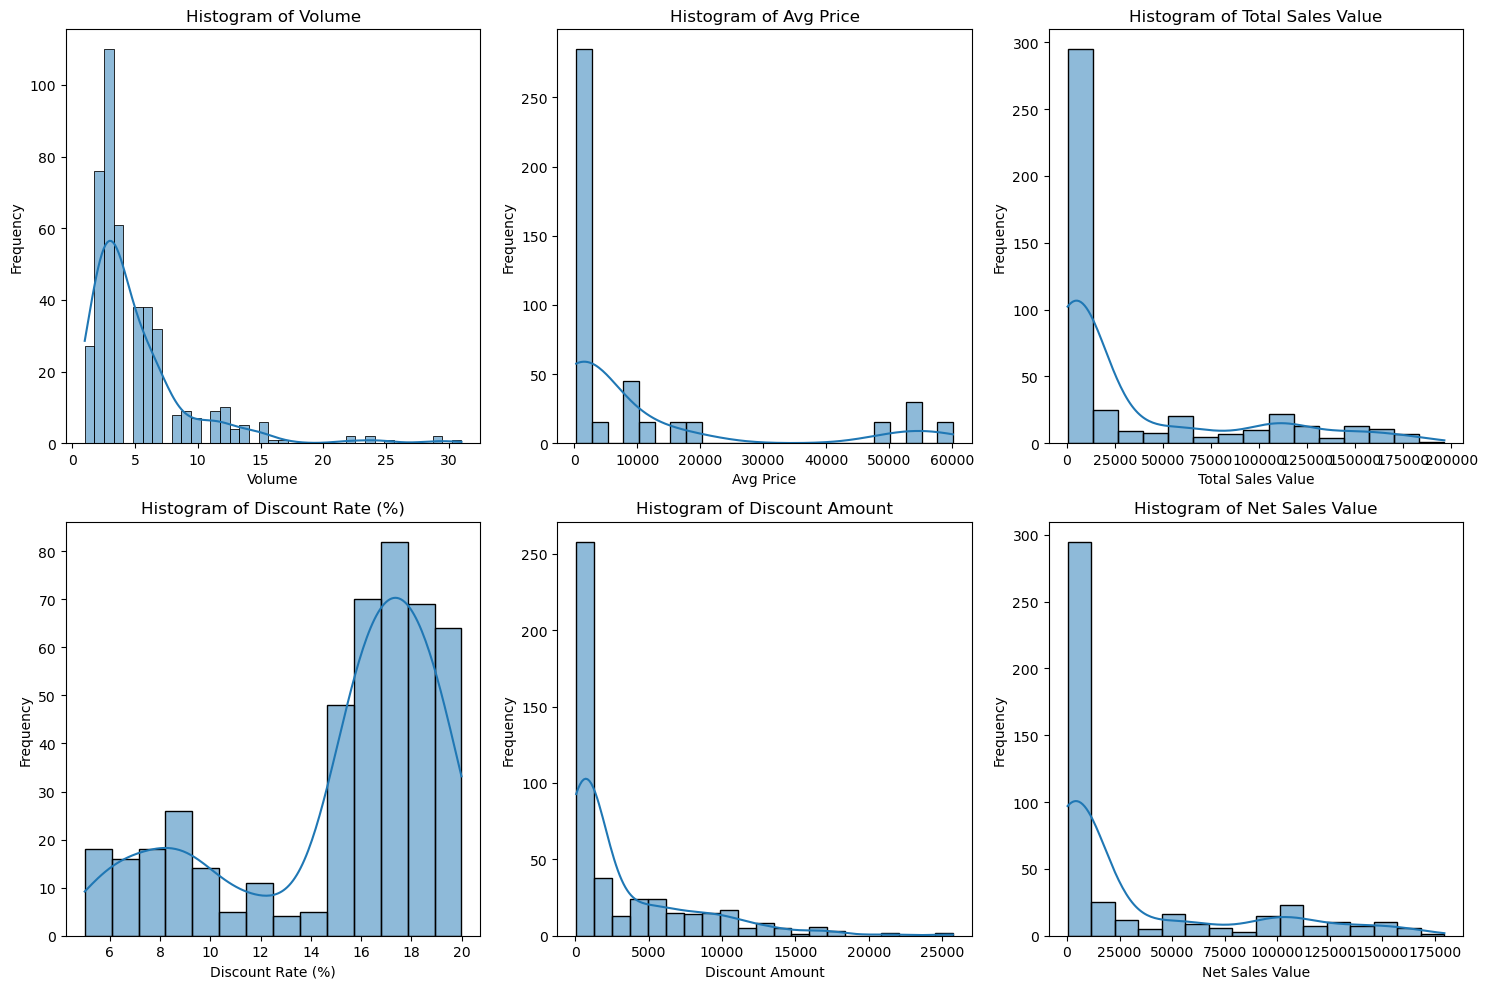

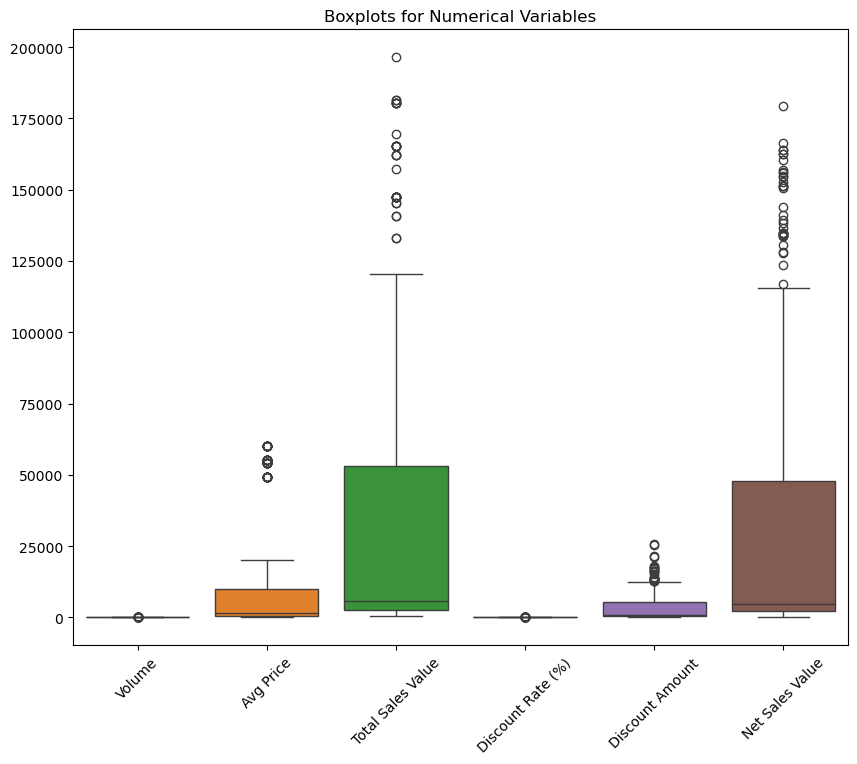

,Date,SKU,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,M01,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01-04-2021,M02,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,...,False,False,False,False,False,False,False,False,False,False
2,01-04-2021,M03,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,...,False,False,False,False,False,False,False,False,True,False
3,01-04-2021,M04,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,...,False,False,False,False,False,False,False,False,False,True
4,01-04-2021,M05,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,...,False,False,False,False,False,False,False,True,False,False


In [3]:

# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

## Descriptive Analytics for Numerical Columns


import pandas as pd
import numpy as np

# Load dataset
file_path = 'sales_data_with_discounts.csv'
sales_data = pd.read_csv(file_path)

# Numerical columns
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Descriptive statistics
numerical_stats = sales_data[numerical_cols].describe()
median_vals = sales_data[numerical_cols].median()
modes = sales_data[numerical_cols].mode().iloc[0]

# Summary statistics
stats_summary = {
    'Mean': numerical_stats.loc['mean'],
    'Median': median_vals,
    'Mode': modes,
    'Std Dev': numerical_stats.loc['std']
}
stats_summary

## Data Visualization

### Histograms for numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(sales_data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Boxplots for numerical columns

plt.figure(figsize=(10, 8))
sns.boxplot(data=sales_data[numerical_cols])
plt.title('Boxplots for Numerical Variables')
plt.xticks(rotation=45)
plt.show()

## Standardization of Numerical Variables

from sklearn.preprocessing import StandardScaler

# Standardization using z-score
scaler = StandardScaler()
standardized_data = scaler.fit_transform(sales_data[numerical_cols])
standardized_df = pd.DataFrame(standardized_data, columns=numerical_cols)
standardized_df.head()

## Conversion of Categorical Data into Dummy Variables

# Categorical columns
categorical_cols = ['Day', 'City', 'BU', 'Brand', 'Model']
encoded_data = pd.get_dummies(sales_data[categorical_cols])

# Combine original data with encoded data
processed_data = pd.concat([sales_data, encoded_data], axis=1)

# Drop original categorical columns
processed_data.drop(categorical_cols, axis=1, inplace=True)

processed_data.head()

## Conclusion

#In this analysis, we examined key descriptive statistics such as mean, median, mode, and standard deviation for numerical columns in the dataset. We also visualized the data using histograms and boxplots to understand the distribution and presence of any outliers. Standardization was applied to ensure the numerical features are scaled, and we transformed categorical variables using one-hot encoding to make the dataset suitable for machine learning algorithms.
